#**Task: Price Range vs. Online Delivery and Table Booking**

##Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

##Determine if higher-priced restaurants are more likely to offer these services.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Task/Cognifyz/Dataset .csv")

In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

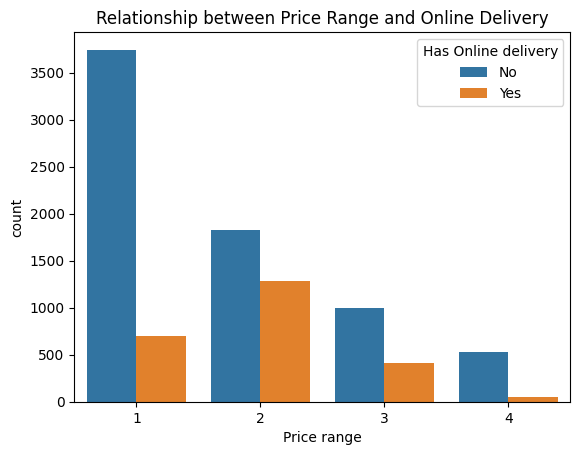

In [26]:
sns.countplot(x='Price range',hue='Has Online delivery',data=df)
plt.title('Relationship between Price Range and Online Delivery')
plt.show()

In [24]:
df['Online_delivery and Table_booking']=df['Has Online delivery']+' '+df['Has Table booking']

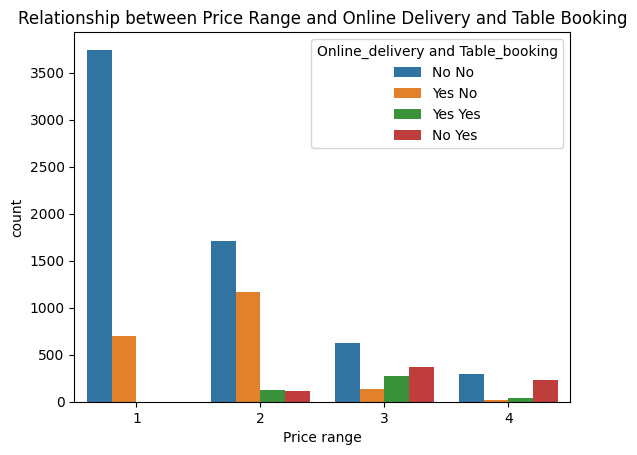

In [27]:
sns.countplot(x='Price range',hue='Online_delivery and Table_booking',data=df)
plt.title('Relationship between Price Range and Online Delivery and Table Booking')
plt.show()

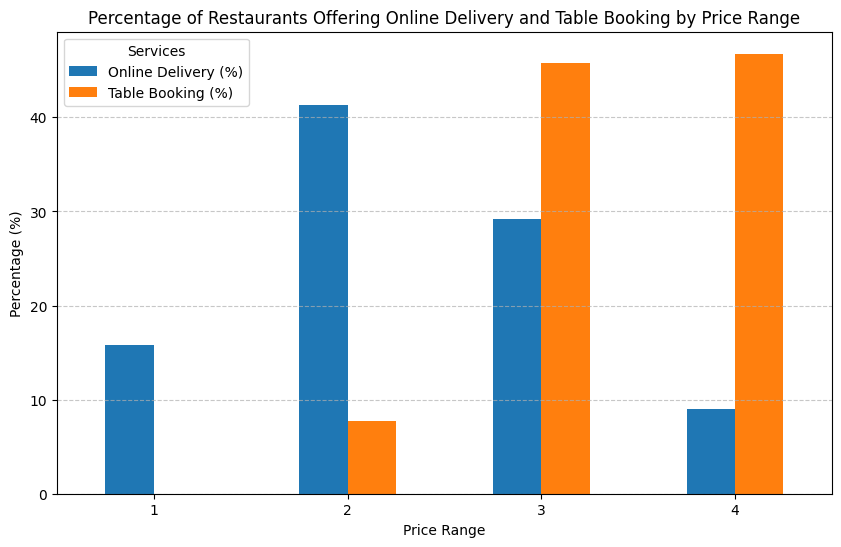

In [32]:
df['Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

# Calculate the percentage of restaurants with online delivery and table booking per price range
online_delivery_percentage = df.groupby('Price range')['Online Delivery'].mean() * 100
table_booking_percentage = df.groupby('Price range')['Table Booking'].mean() * 100

# Combine the results into a single DataFrame
percentage_df = pd.DataFrame({
    'Online Delivery (%)': online_delivery_percentage,
    'Table Booking (%)': table_booking_percentage
})

# Plotting the data
percentage_df.plot(kind='bar', figsize=(10, 6))
plt.title("Percentage of Restaurants Offering Online Delivery and Table Booking by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Services")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
